In [2]:
import pandas as pd
import numpy as np

data = {"Energy Source": ["Solar","Wind","Hydropower","Geothermal","Biomass","Nuclear"],
        "Energy Consumption(Mwh)": [1200,np.nan,2500,np.nan,2500,3200],
        "Cost(Million $)":[200,400,np.nan,150,250,np.nan]}

energy_df=pd.DataFrame(data)

print("Original Energy Data with Missing Values:")
print(energy_df)

Original Energy Data with Missing Values:
  Energy Source  Energy Consumption(Mwh)  Cost(Million $)
0         Solar                   1200.0            200.0
1          Wind                      NaN            400.0
2    Hydropower                   2500.0              NaN
3    Geothermal                      NaN            150.0
4       Biomass                   2500.0            250.0
5       Nuclear                   3200.0              NaN


In [3]:
cleaned_df=energy_df.dropna()

print("\nData After Removing Rows with Missing Values:")
print(cleaned_df)


Data After Removing Rows with Missing Values:
  Energy Source  Energy Consumption(Mwh)  Cost(Million $)
0         Solar                   1200.0            200.0
4       Biomass                   2500.0            250.0


In [4]:
forward_filled_df=energy_df.fillna(method="ffill")

print("\nData After Forward Filling:")
print(forward_filled_df)


Data After Forward Filling:
  Energy Source  Energy Consumption(Mwh)  Cost(Million $)
0         Solar                   1200.0            200.0
1          Wind                   1200.0            400.0
2    Hydropower                   2500.0            400.0
3    Geothermal                   2500.0            150.0
4       Biomass                   2500.0            250.0
5       Nuclear                   3200.0            250.0


C:\Users\User\AppData\Local\Temp\ipykernel_11584\3343191674.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forward_filled_df=energy_df.fillna(method="ffill")


In [8]:
energy_df["Energy Consumption(Mwh)"].fillna(energy_df["Energy Consumption(Mwh)"].mean(),inplace=True)
energy_df["Cost(Million $)"].fillna(energy_df["Cost(Million $)"].mean(),inplace=True)

print("\nData After Imputing Missing Valuse with Mean:")
print(energy_df)


Data After Imputing Missing Valuse with Mean:
  Energy Source  Energy Consumption(Mwh)  Cost(Million $)
0         Solar                   1200.0            200.0
1          Wind                   2350.0            400.0
2    Hydropower                   2500.0            250.0
3    Geothermal                   2350.0            150.0
4       Biomass                   2500.0            250.0
5       Nuclear                   3200.0            250.0


C:\Users\User\AppData\Local\Temp\ipykernel_11584\1679797612.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  energy_df["Energy Consumption(Mwh)"].fillna(energy_df["Energy Consumption(Mwh)"].mean(),inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_11584\1679797612.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

In [9]:
energy_df["Mission Consumption"]=energy_df["Energy Consumption(Mwh)"].isna().astype(int)

print("\nData with Missing Values Flagged:")
print(energy_df)


Data with Missing Values Flagged:
  Energy Source  Energy Consumption(Mwh)  Cost(Million $)  Mission Consumption
0         Solar                   1200.0            200.0                    0
1          Wind                   2350.0            400.0                    0
2    Hydropower                   2500.0            250.0                    0
3    Geothermal                   2350.0            150.0                    0
4       Biomass                   2500.0            250.0                    0
5       Nuclear                   3200.0            250.0                    0


In [10]:
pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------------------------- -------------- 7.1/11.1 MB 43.7 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 36.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   ------------------ --------------------- 20.2/43.6 MB 106.0 MB/s eta 0:00:01
   ----------------------------------- ---- 38.8/43.6 MB 94.9 MB/s eta 0:00:01
   ---------------------------------------- 43.6/43.6 MB 84.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
energy_df[["Energy Consumption(Mwh)","Cost(Million $)"]]=scaler.fit_transform(energy_df[["Energy Consumption(Mwh)","Cost(Million $)"]])

print("\nData After Normalization(Min-Max Scaling):")
print(energy_df)


Data After Normalization(Min-Max Scaling):
  Energy Source  Energy Consumption(Mwh)  Cost(Million $)  Mission Consumption
0         Solar                    0.000              0.2                    0
1          Wind                    0.575              1.0                    0
2    Hydropower                    0.650              0.4                    0
3    Geothermal                    0.575              0.0                    0
4       Biomass                    0.650              0.4                    0
5       Nuclear                    1.000              0.4                    0


In [12]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
energy_df[["Energy Consumption(Mwh)","Cost(Million $)"]]=scaler.fit_transform(energy_df[["Energy Consumption(Mwh)","Cost(Million $)"]])

print("\nData After Standardization(Z-score Scaling):")
print(energy_df)


Data After Standardization(Z-score Scaling):
  Energy Source  Energy Consumption(Mwh)  Cost(Million $)  Mission Consumption
0         Solar                -1.948500    -6.546537e-01                    0
1          Wind                 0.000000     1.963961e+00                    0
2    Hydropower                 0.254152     1.817029e-16                    0
3    Geothermal                 0.000000    -1.309307e+00                    0
4       Biomass                 0.254152     1.817029e-16                    0
5       Nuclear                 1.440195     1.817029e-16                    0


In [13]:
energy_encoded_df=pd.get_dummies(energy_df,columns=["Energy Source"])

print("\nData After One-Hot Encoding Categorical Variables:")
print(energy_encoded_df)


Data After One-Hot Encoding Categorical Variables:
   Energy Consumption(Mwh)  Cost(Million $)  Mission Consumption  \
0                -1.948500    -6.546537e-01                    0   
1                 0.000000     1.963961e+00                    0   
2                 0.254152     1.817029e-16                    0   
3                 0.000000    -1.309307e+00                    0   
4                 0.254152     1.817029e-16                    0   
5                 1.440195     1.817029e-16                    0   

   Energy Source_Biomass  Energy Source_Geothermal  Energy Source_Hydropower  \
0                  False                     False                     False   
1                  False                     False                     False   
2                  False                     False                      True   
3                  False                      True                     False   
4                   True                     False                     

In [14]:
pip install matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 8.0/8.0 MB 45.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 60.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 38.1 MB/s eta 0:00:00


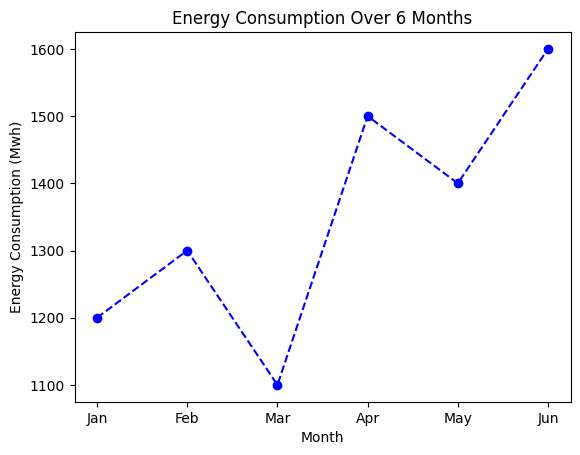

In [19]:
import matplotlib.pyplot as plt

months=['Jan','Feb','Mar','Apr','May','Jun']
energy_consumption =[1200,1300,1100,1500,1400,1600]

plt.plot(months,energy_consumption,marker='o',color='b',linestyle='--')

plt.title('Energy Consumption Over 6 Months')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (Mwh)')
plt.show()

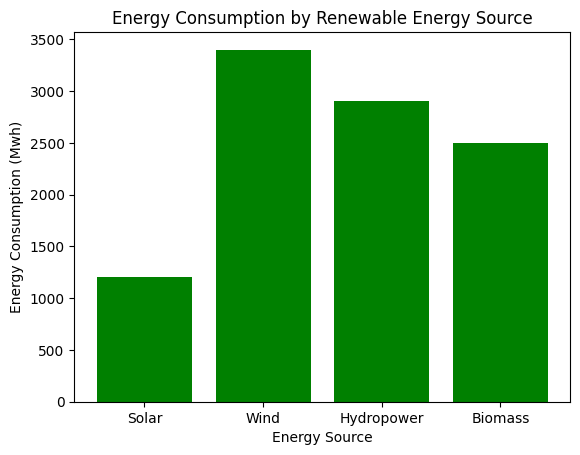

In [20]:
energy_sources = ['Solar', 'Wind', 'Hydropower', 'Biomass']
energy_values = [1200, 3400, 2900, 2500]

plt.bar(energy_sources, energy_values, color='green')

plt.title('Energy Consumption by Renewable Energy Source')
plt.xlabel('Energy Source')
plt.ylabel('Energy Consumption (Mwh)')
plt.show()

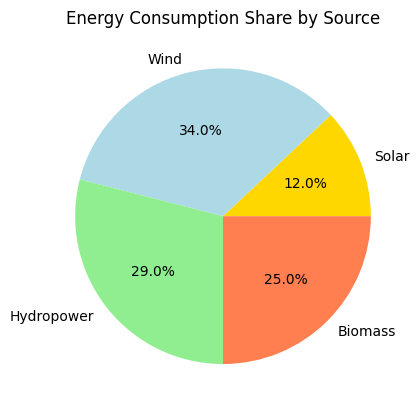

In [21]:
plt.pie(energy_values,labels=energy_sources,autopct='%1.1f%%',colors=['gold','lightblue','lightgreen','coral'])

plt.title('Energy Consumption Share by Source')
plt.show()